# Understanding Variational Autoencoders (VAE)

These notes are adapted from _Understanding Variational Autoencoders (VAEs) | Deep Learning_ found [here](https://www.youtube.com/watch?v=HBYQvKlaE0A).

The VAE is a form of _Generative Model_. It learns a distribution of the input data in order to be able to produce new samples.

Assuming that we have some _true_ distribution $p^*(\mathbf{x})$ of the data $\mathbf{x}$, we want to build some probalisitic model $p_\theta(\mathbf{x})$ where $\theta$ are a set of parameters which enable $p_\theta(\mathbf{x})$ to approximate $p^*(\mathbf{x})$ i.e.
$\begin{equation}
p^*(\mathbf{x}) \approx p_\theta(\mathbf{x})
\end{equation}$

From the point of view of probailistic modelling, one wants to maximize the _likelihood_ of the data $\mathbf{x}$ by their chosen probability distribution, $p_\theta(\mathbf{x}) = p(\mathbf{x} | \theta)$. We want to adjust $\theta$ to maximising the likelihood of observing the datapoints $\mathbf{x}$ in the distribution; this is called _maximum likelihood estimation_.

<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:17: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_50302/4259301866.py:16: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, norm.pdf(x, loc=1, scale=3), label='$\mu=1$, $\sigma=3$')
/tmp/ipykernel_50302/4259301866.py:17: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, norm.pdf(x, loc=3, scale=1), label='$\mu=3$, $\sigma=1$')


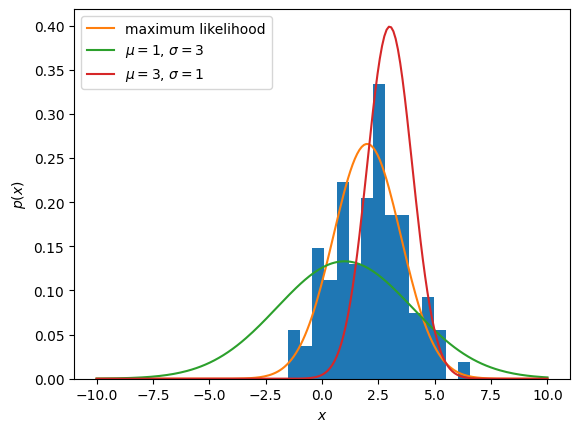

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

true_mean = 2
true_std = 1.5

data = np.random.normal(loc=true_mean, scale=true_std, size=100)

# Probability Distribution
x = np.linspace(-10, 10, 200)

plt.figure()
plt.hist(data, bins=15, density=True)
plt.plot(x, norm.pdf(x, loc=true_mean, scale=true_std), label='maximum likelihood')
plt.plot(x, norm.pdf(x, loc=1, scale=3), label='$\mu=1$, $\sigma=3$')
plt.plot(x, norm.pdf(x, loc=3, scale=1), label='$\mu=3$, $\sigma=1$')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

Above, we can see that in this case, the set of parameters $\theta = \{\mu, \sigma\}$, and when they are the true values, they (unsurprisingly) match the data best; it is the exact same problem that a VAE tries to solve.

# Latent Variables
A lot of the time, our data $\mathbf{x}$ is of a significantly larger dimensionality than what is needed to succinctly and accurately describe our data. For example, if we wanted to describe a picture of a circle, describing the value of each pixel is perhaps not as elegant and compact as say, describing the radius and origin of the circle. VAEs are capable of learning this _encoding_ into what are called *latent variables*, $\mathbf{z}$. where $\mathbf{x} \in \mathbb{R}^D$, $\mathbf{z} \in \mathbb{R}^d$ and $d<D$.

Our distribution should be able to infer and generate these latent variables too:
- Inference: $p_\theta(\mathbf{z} | \mathbf{x})$
- Generation: $p_\theta(\mathbf{x} | \mathbf{z})$

The parameters, $\theta$ ensure that our model generates the _right_ features, when inferencing from data to latent variables, and ensures that our latent variables convert back to reasonable data values via generation.

So what this means is that we actually, want to find the parameters $\theta$ for a joint-distribution, $p_\theta(\mathbf{z}, \mathbf{x})$. This can be written as:

$\begin{equation}
p_\theta(\mathbf{z}, \mathbf{x}) = p_\theta(\mathbf{z}) \cdot p_\theta(\mathbf{x}|\mathbf{z})
\end{equation}$

whereby $p_\theta(\mathbf{z})$ is the probability distribution of $\mathbf{z}$, and $p_\theta(\mathbf{x}|\mathbf{z})$ is the _conditional probability_ of $\mathbf{x}$, given $\mathbf{z}$. The latent variable $\mathbf{z}$ is unknown and is typically chosen to a Gaussian distribution.

# Solving for the parameters, $\theta$
By marginalizing to find $p_\theta(\mathbf{x})$, we can then maximise this function to find the optimal parameters $\theta$:

$\begin{align}
p_\theta(\mathbf{x}) &= \int_\mathbf{z} p_\theta(\mathbf{z},\mathbf{x}) d\mathbf{z}\\
&= \int_\mathbf{z} p_\theta(\mathbf{z}) \cdot p_\theta(\mathbf{x}|\mathbf{z}) d\mathbf{z}
\end{align}$



Since we're marginalizing, this leads to us calling $p_\theta(\mathbf{x})$ the _marginal likelihood_. This probability distribution should be high for data points $\mathbf{x}$ for an optimal $\theta$. In theory, $\theta$ can be determined by optimisation (such as gradient descent). However, unfortunaely, our integral is _intractable_; it's infeasible to compute since it has no analytical solution, and cannot be estimated.

## Optimising for $\theta$
A VAE works around this intractability by realising that we don't need to actually compute $p_\theta(\mathbf{x})$, but to just increase it as much as possible for the samples in our dataset. It does this using a _Bayesian_ framework.

# VAE in Bayes Framework
Plugging our distributions into Bayes theorem gives us:

$\begin{equation}
p_\theta(\mathbf{z}|\mathbf{x}) = \frac{p_\theta(\mathbf{z}) \cdot p_\theta(\mathbf{x}|\mathbf{z})}{p_\theta(\mathbf{x})}
\end{equation}$

We can then rearrange this for $p_\theta(\mathbf{x})$, substituting $p_\theta(\mathbf{z}) \cdot p_\theta(\mathbf{x}|\mathbf{z})$ for $p_\theta(\mathbf{x}, \mathbf{z})$:

$\begin{equation}
p_\theta(\mathbf{x}) = \frac{p_\theta(\mathbf{x}, \mathbf{z})}{p_\theta(\mathbf{z}| \mathbf{x})}
\end{equation}$

Just through observation of the equation, we can see that by maximising the RHS, we maximise $p_\theta(\mathbf{x})$ but unfortunately, we still have the issue that $p_\theta(\mathbf{x})$ is intractable. Actually, $p_\theta(\mathbf{z}| \mathbf{x})$ too, is intractable. However, $p_\theta(\mathbf{x}, \mathbf{z})$ is in fact tractable, which means we can shift our focus away from trying to maximise $p_\theta(\mathbf{x})$, and instead focus on finding the intractable distribution $p_\theta(\mathbf{z} | \mathbf{x})$ instead. This can be achieved through _Variational Inference_.

# Variational Inference
This technique aims to approximate $p_\theta(\mathbf{z}| \mathbf{x})$ with a different distribution, $q_\phi(\mathbf{z}| \mathbf{x})$. By finding a $q_\phi$ which models $p_\theta$ well, we can then maximise $p_\theta(\mathbf{x})$. This is sometimes called _amortized inference_.

## Kullback-Leibler (KL) divergence
When substituting one distribution for another, there is naturally some degree of information loss. One such measure of this is the _KL_ divergence. By using the KL divergence as a loss function, it is possible to _squeeze_ $q_\phi(\mathbf{z}| \mathbf{x})$ towards $p_\theta(\mathbf{z}| \mathbf{x})$. An important property of the KL divergence is the fact that it cannot be negative since a negative information loss doesn't really make sense in this context.

We can compute the KL divergence between $p_\theta(\mathbf{z}| \mathbf{x})$ and $q_\phi(\mathbf{z}| \mathbf{x})$ through:

$\begin{align}
D_{KL}\left(q_\phi(\mathbf{z}| \mathbf{x}) || p_\theta(\mathbf{z}| \mathbf{x})\right) &= \int_\mathbf{z} q_\phi(\mathbf{z}| \mathbf{x}) \cdot \log\left(\frac{q_\phi(\mathbf{z}| \mathbf{x})}{p_\theta(\mathbf{z}| \mathbf{x})}\right) \\
&= \mathbb{E}_{q_\phi}\left[\log\frac{q_\phi(\mathbf{z}| \mathbf{x})}{p_\theta(\mathbf{z}| \mathbf{x})}\right] \\
&= \mathbb{E}_{q_\phi}\left[\log (q_\phi(\mathbf{z}| \mathbf{x}))\right] - \mathbb{E}_{q_\phi}\left[\log (p_\theta(\mathbf{z}| \mathbf{x}))\right] \\
&= \mathbb{E}_{q_\phi}\left[\log (q_\phi(\mathbf{z}| \mathbf{x}))\right] - \mathbb{E}_{q_\phi}\left[\log \frac{p_\theta(\mathbf{x}, \mathbf{z})}{p_\theta(\mathbf{x})}\right]\\
&= \mathbb{E}_{q_\phi}\left[\log (q_\phi(\mathbf{z}| \mathbf{x}))\right] - \mathbb{E}_{q_\phi}\left[\log (p_\theta(\mathbf{x}, \mathbf{z}))\right] + \mathbb{E}_{q_\phi}\left[\log (p_\theta(\mathbf{x}))\right] \\
&=\log (p_\theta(\mathbf{x})) - \mathbb{E}_{q_\phi}\left[\log (p_\theta(\mathbf{x}, \mathbf{z})) -  \log(q_\phi(\mathbf{z}| \mathbf{x}))\right]
\end{align}$

Note that $\log (p_\theta(\mathbf{x})) = \mathbb{E}_{q_\phi}\log (p_\theta(\mathbf{x}))$ but since $p_\theta(\mathbf{x})$ is independent on $\mathbf{z}$. We still have an issue whereby $q_\phi(\mathbf{z}| \mathbf{x})$ is still intractable but let's now rearrange this equation:

$\begin{equation}
\log (p_\theta(\mathbf{x})) = D_{KL}\left(q_\phi(\mathbf{z}| \mathbf{x}) || p_\theta(\mathbf{z}| \mathbf{x})\right) + \mathbb{E}_{q_\phi}\left[\log (p_\theta(\mathbf{x}, \mathbf{z})) -  \log(q_\phi(\mathbf{z}| \mathbf{x}))\right]
\end{equation}$

Since the KL divergence is always positive, we can make the conclusion that:

$\begin{equation}
\log (p_\theta(\mathbf{x})) \ge \mathbb{E}_{q_\phi}\left[\log (p_\theta(\mathbf{x}, \mathbf{z})) -  \log(q_\phi(\mathbf{z}| \mathbf{x}))\right]
\end{equation}$

and thus, we can say that the second term in the question sets a _lower bound_ on the log likelihood of $p_\theta(x)$. This term on the right is often called the _Evidence Lower Bound_ (ELBO)

The consequence of this derivation, is that we can think of the KL divergence as the difference between the $\log p_\theta(x)$, and $\mathbb{E}_{q_\phi}\left[\log (p_\theta(\mathbf{x}, \mathbf{z})) -  \log(q_\phi(\mathbf{z}| \mathbf{x}))\right]$, i.e.:

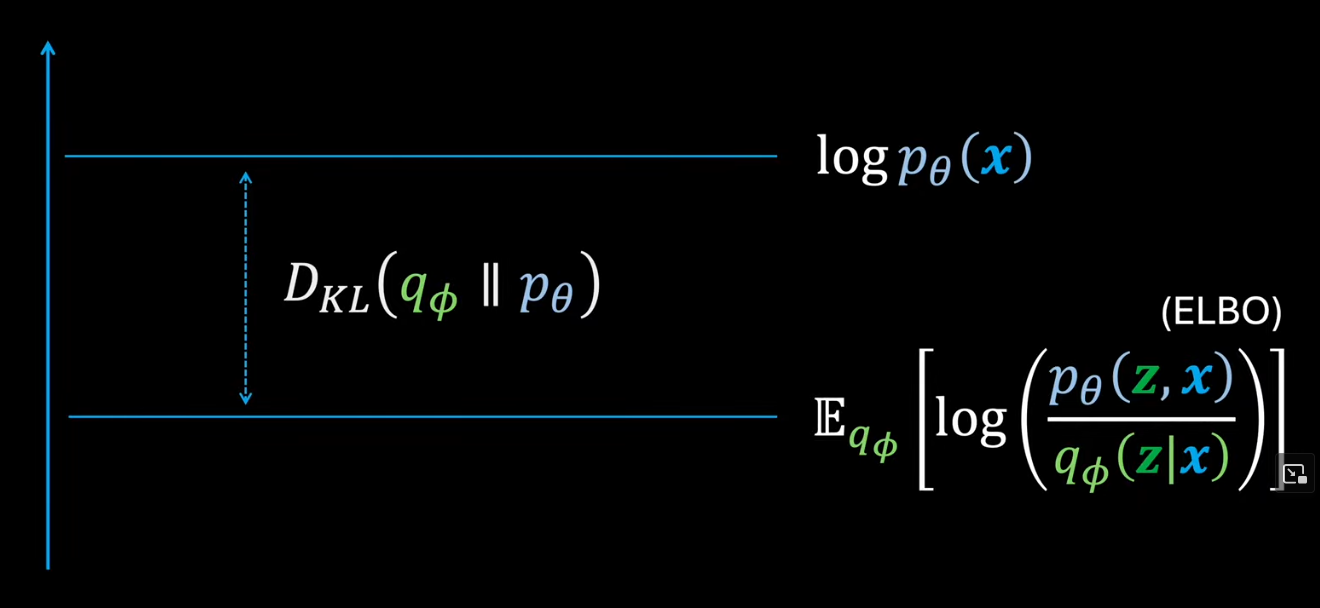

By lowering the KL divergence, we can reduce the difference between $\log p_\theta(x)$ and the ELBO. Conversely, by maximising the ELBO, $\log p_\theta(x)$ will increase, and the KL Divergence will decrease.

How do we turn this into an actual loss function however? To start, let's rearrange our equation a bit more.


$\begin{align}
L(\theta, \phi; \mathbf{x}) &= \mathbb{E}_{q_\phi}\left[\log (p_\theta(\mathbf{x}, \mathbf{z})) -  \log(q_\phi(\mathbf{z}| \mathbf{x}))\right]\\
&= \mathbb{E}_{q_\phi}\left[\log p_\theta(\mathbf{x} | \mathbf{z})p_\theta(\mathbf{z}) - \log(q_\phi(\mathbf{z}| \mathbf{x}))\right] \\
&= \mathbb{E}_{q_\phi}\left[\log p_\theta(\mathbf{x} | \mathbf{z})\right] + \mathbb{E}_{q_\phi} \left[p_\theta(\mathbf{z}) - \log(q_\phi(\mathbf{z}| \mathbf{x}))\right] \\
&= \mathbb{E}_{q_\phi}\left[\log p_\theta(\mathbf{x} | \mathbf{z})\right] - D_{KL}\left(q_\phi(\mathbf{z} | \mathbf{x})||p_\theta(\mathbf{z}) \right) \\
\end{align}$

this can be combined with the previous equation to give

$\begin{equation}
\log (p_\theta(\mathbf{x})) = L(\theta, \phi;\mathbf{x}) + D_{KL}\left(q_\phi(\mathbf{z}| \mathbf{x}) || p_\theta(\mathbf{z}| \mathbf{x})\right)
\end{equation}$



There are a few observations from this function. Since $D_{KL}\left(q_\phi(\mathbf{z}| \mathbf{x}) || p_\theta(\mathbf{z}| \mathbf{x})\right) \ge 0$, we can infer that $\log (p_\theta(\mathbf{x})) \ge L(\theta, \phi;\mathbf{x})$. So by maximising the ELBO, this will result in increasing $L$ whilst minimising the second KL Divergence term; we never compute $D_{KL}$ here and only focus on $L$

# Maximising the ELBO